In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,DenseNet121,VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten
import matplotlib.pyplot as plt

In [2]:
train_dir = r"C:\Users\anuhy\Downloads\pneumonia\chest_xray\train"
val_dir = r"C:\Users\anuhy\Downloads\pneumonia\chest_xray\val"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
# Build the DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the base model layers (optional)
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Flatten()(x)  # Flatten the output of the base model
x = Dense(1024, activation='relu')(x)  # Add a dense layer with ReLU activation
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)


In [5]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)  # Create the final model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["acc"])
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


C:\Users\anuhy\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 780s 16s/step - acc: 0.7136 - loss: 14.5932 - val_acc: 0.8750 - val_loss: 1.3254
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 588s 13s/step - acc: 0.9173 - loss: 0.4361 - val_acc: 0.9375 - val_loss: 0.2846
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 665s 15s/step - acc: 0.9397 - loss: 0.1738 - val_acc: 0.8125 - val_loss: 0.2615
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 596s 13s/step - acc: 0.9456 - loss: 0.1546 - val_acc: 0.9375 - val_loss: 0.2078
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 585s 13s/step - acc: 0.9479 - loss: 0.1409 - val_acc: 0.9375 - val_loss: 0.2030
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 662s 15s/step - acc: 0.9416 - loss: 0.1394 - val_acc: 0.9375 - val_loss: 0.2096
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 592s 13s/step - acc: 0.9476 - loss: 0.1294 - val_acc: 0.9375 - val_loss: 0.2093
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 565s 12s/step - acc: 0.9557 - loss: 0.1252 - val_acc: 0.9375 - val_loss: 0.2496
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 594s 13s/step - acc: 0.9620 

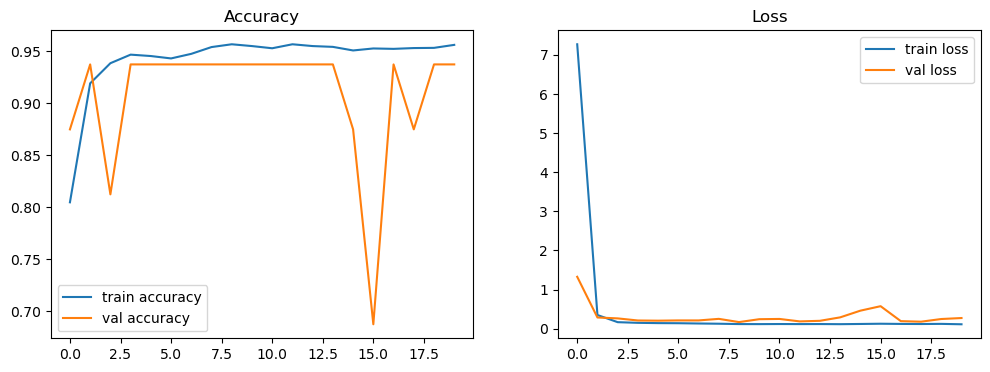

In [8]:
# Plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


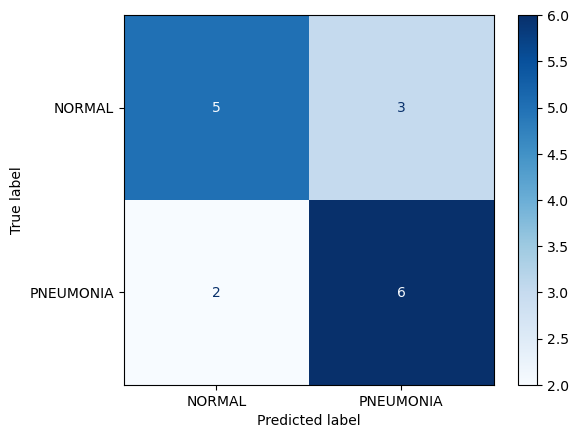

In [10]:
# Generate confusion matrix
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.round(Y_pred)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()